In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Generic Data Cleaning and EDA
Import Data and Check the properties

In [16]:
df=pd.read_csv("Ambulatory Surgical Measures-Facility.csv",encoding='latin1')


In [17]:
df.head()


,ASC_Name,Provider_ID,NPI,City,State,ZIP_Code,Year,ASC1_Measure_Rate,ASC1_Footnote,ASC2_Measure_Rate,...,ASC_6_7_Encounter_End_Date,ASC_8_rate,ASC8_Footnote,ASC_8_Encounter_Date,ASC_9_rate,ASC9_Footnote,ASC_10_rate,ASC10_Footnote,ASC_9_10_Encounter_Start_Date,ASC_9_10_Encounter_End_Date
0,Awh Holdings LLC,02C0001000,1.033396e+09,Anchorage,AK,99508,2014,0.0,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Alaska Spine Center, LLC",02C0001006,1.093711e+09,Anchorage,AK,99508,2014,0.0,NaN,3.831,...,12/31/2014,62.50,NaN,2014/2015,NaN,N/A (5),NaN,N/A (5),01/01/2014,12/31/2014
2,Alaska Surgery Center LTD,02C0001001,1.205892e+09,Anchorage,AK,99508,2014,0.0,NaN,0.000,...,12/31/2014,52.38,NaN,2014/2015,NaN,N/A (5),NaN,N/A (5),01/01/2014,12/31/2014
3,Surgery Center of Fairbanks LLC,02C0001012,1.255652e+09,Fairbanks,AK,99709,2014,NaN,N/A (5),NaN,...,12/31/2014,76.60,NaN,2014/2015,64.29,NaN,75.0,NaN,01/01/2014,12/31/2014
4,"Alaska Spine Institute Surgery Center, LLC",02C0001008,1.316942e+09,Anchorage,AK,99508,2014,0.0,NaN,0.000,...,12/31/2014,59.38,NaN,2014/2015,NaN,N/A (5),NaN,N/A (5),01/01/2014,12/31/2014


In [18]:
df.shape


(10498, 42)

In [19]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

ASC_Name                          0.00
Provider_ID                       0.86
NPI                               0.01
City                              0.00
State                             0.00
ZIP_Code                          0.00
Year                              0.00
ASC1_Measure_Rate                11.77
ASC1_Footnote                    89.54
ASC2_Measure_Rate                11.77
ASC2_Footnote                    89.54
ASC3_Measure_Rate                11.77
ASC3_Footnote                    89.54
ASC4_Measure_Rate                11.78
ASC4_Footnote                    89.53
ASC5_Measure_Rate                58.41
ASC5_Footnote                    42.90
ASC_1_5_Encounter_Start_Date      1.31
ASC_1_5_Encounter_End_Date        1.31
ASC6_SSChecklist                 58.77
ASC6_Footnote                    97.32
ASC_7_Volume                     58.94
ASC_7_Gastrointestinal           58.94
ASC_7_Eye                        58.94
ASC_7_Musculoskeletal            58.94
ASC_7_Skin               

In [20]:
#Dropping columns having more than 50% null values and eliminating rows having null values
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(10498, 14)

In [21]:
df=df.dropna(axis=0, how='any')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4865 entries, 5 to 10494
Data columns (total 14 columns):
ASC_Name                        4865 non-null object
Provider_ID                     4865 non-null object
NPI                             4865 non-null float64
City                            4865 non-null object
State                           4865 non-null object
ZIP_Code                        4865 non-null int64
Year                            4865 non-null int64
ASC1_Measure_Rate               4865 non-null float64
ASC2_Measure_Rate               4865 non-null float64
ASC3_Measure_Rate               4865 non-null float64
ASC4_Measure_Rate               4865 non-null float64
ASC5_Footnote                   4865 non-null object
ASC_1_5_Encounter_Start_Date    4865 non-null object
ASC_1_5_Encounter_End_Date      4865 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 570.1+ KB


Removing unwanted data -
This step will be specific to your dataset
data where most of the metrics are not available/not applicable wont give any info so removing such records. Address , city, state can be removed as we have Zip Code

In [23]:
df=df.drop(["City","State"],axis=1)


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4865 entries, 5 to 10494
Data columns (total 12 columns):
ASC_Name                        4865 non-null object
Provider_ID                     4865 non-null object
NPI                             4865 non-null float64
ZIP_Code                        4865 non-null int64
Year                            4865 non-null int64
ASC1_Measure_Rate               4865 non-null float64
ASC2_Measure_Rate               4865 non-null float64
ASC3_Measure_Rate               4865 non-null float64
ASC4_Measure_Rate               4865 non-null float64
ASC5_Footnote                   4865 non-null object
ASC_1_5_Encounter_Start_Date    4865 non-null object
ASC_1_5_Encounter_End_Date      4865 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 494.1+ KB


In [25]:
df=df.fillna(0)

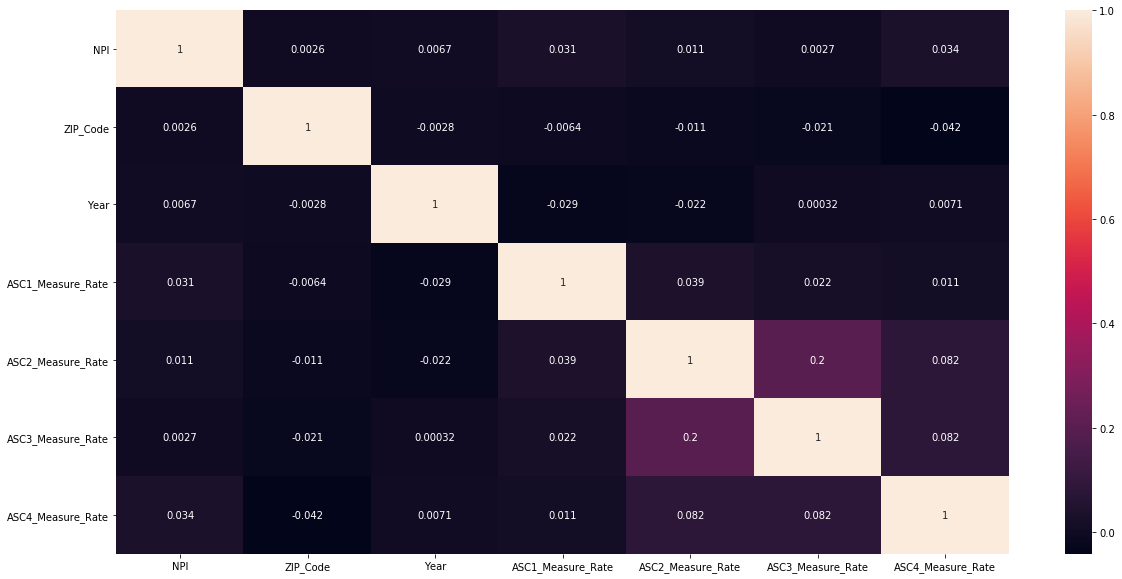

In [26]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()


We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets

In [28]:
#Writing cleaned data to another file
df.to_csv('Ambulatory_Cleaned.csv')

In [29]:
Ambulatory_Cleaned = df[:]
Ambulatory_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4865 entries, 5 to 10494
Data columns (total 12 columns):
ASC_Name                        4865 non-null object
Provider_ID                     4865 non-null object
NPI                             4865 non-null float64
ZIP_Code                        4865 non-null int64
Year                            4865 non-null int64
ASC1_Measure_Rate               4865 non-null float64
ASC2_Measure_Rate               4865 non-null float64
ASC3_Measure_Rate               4865 non-null float64
ASC4_Measure_Rate               4865 non-null float64
ASC5_Footnote                   4865 non-null object
ASC_1_5_Encounter_Start_Date    4865 non-null object
ASC_1_5_Encounter_End_Date      4865 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 494.1+ KB
